In [2]:
import pandas as pd
from pathlib import Path
import os
import glob

In [3]:
from typing import AnyStr


lightsail2: Path = "../data/satellites/lightsail-2"

all_files: list[AnyStr] = glob.glob(os.path.join(lightsail2, "*.csv"))

lightsail2_data = pd.DataFrame()

for f in all_files:
    parsed_df: pd.DataFrame = pd.read_csv(f, parse_dates=["Time"])
    
    if lightsail2_data.empty:
        lightsail2_data = parsed_df
    
    if not parsed_df.empty:
        lightsail2_data = pd.merge(lightsail2_data, parsed_df, on="Time", how="outer")

lightsail2_data['Time'] = pd.to_datetime(lightsail2_data['Time']).dt.normalize()

print(lightsail2_data)

          Time  OS Processes_x  Memory Cached (kB)_x  Memory Free (kB)_x  \
0   2019-07-02            5935                 11845               95598   
1   2019-07-03            6208                 13018               93787   
2   2019-07-04           15678                 19347               86712   
3   2019-07-05           24868                 22060               83496   
4   2019-07-06           31168                 24677               80532   
..         ...             ...                   ...                 ...   
391 2022-11-11            3714                 98988                3056   
392 2022-11-12            5580                 88066               10385   
393 2022-11-13            1319                 17701               85837   
394 2022-11-14           18053                 20846               56123   
395 2022-11-15            5413                 22994               73939   

     OS Processes_y  Memory Cached (kB)_y  Memory Free (kB)_y  \
0              5935   

In [4]:
import json
from typing import Any


swpc_observed_ssn_path: Path = "../data/solar/swpc/swpc_observed_ssn.json"

swpc_observed_ssn = pd.DataFrame()

with open(swpc_observed_ssn_path, 'r') as f:
    loaded_json: Any = json.load(f)
    swpc_observed_ssn = pd.DataFrame(loaded_json)
    
swpc_observed_ssn['Obsdate'] = pd.to_datetime(swpc_observed_ssn['Obsdate'])


print(swpc_observed_ssn)

        Obsdate  swpc_ssn
0    1996-03-12         0
1    1996-08-18        14
2    1996-08-19         0
3    1996-08-20         0
4    1996-08-21        12
...         ...       ...
9132 2024-09-29       154
9133 2024-09-30       150
9134 2024-10-01       196
9135 2024-10-02       194
9136 2024-10-03       184

[9137 rows x 2 columns]


In [5]:
swpc_observed_solar_cycle_indicies_path: Path = "../data/solar/swpc/observed-solar-cycle-indices.json"

swpc_observed_solar_cycle_indicies = pd.DataFrame()

with open(swpc_observed_solar_cycle_indicies_path, 'r') as f:
    loaded_json: Any = json.load(f)
    swpc_observed_solar_cycle_indicies = pd.DataFrame(loaded_json)
    
swpc_observed_solar_cycle_indicies['time-tag'] = pd.to_datetime(swpc_observed_solar_cycle_indicies['time-tag'])


print(swpc_observed_solar_cycle_indicies)

       time-tag    ssn  smoothed_ssn  observed_swpc_ssn  smoothed_swpc_ssn  \
0    1749-01-01   96.7          -1.0              -1.00               -1.0   
1    1749-02-01  104.3          -1.0              -1.00               -1.0   
2    1749-03-01  116.7          -1.0              -1.00               -1.0   
3    1749-04-01   92.8          -1.0              -1.00               -1.0   
4    1749-05-01  141.7          -1.0              -1.00               -1.0   
...         ...    ...           ...                ...                ...   
3304 2024-05-01  171.7          -1.0             146.26               -1.0   
3305 2024-06-01  164.2          -1.0             157.10               -1.0   
3306 2024-07-01  196.5          -1.0             190.29               -1.0   
3307 2024-08-01  215.5          -1.0             203.10               -1.0   
3308 2024-09-01  141.4          -1.0             147.97               -1.0   

       f10.7  smoothed_f10.7  
0      -1.00            -1.0  
1

In [6]:
from matplotlib import pyplot as plt

dynamics = pd.merge(
    lightsail2_data, swpc_observed_ssn, left_on="Time", right_on="Obsdate", how="left"
)
dynamics.drop(columns=["Obsdate"], inplace=True)

dynamics = pd.merge(
    dynamics,
    swpc_observed_solar_cycle_indicies,
    left_on="Time",
    right_on="time-tag",
    how="left",
)
dynamics.drop(columns=["time-tag"], inplace=True)

print(dynamics)

          Time  OS Processes_x  Memory Cached (kB)_x  Memory Free (kB)_x  \
0   2019-07-02            5935                 11845               95598   
1   2019-07-03            6208                 13018               93787   
2   2019-07-04           15678                 19347               86712   
3   2019-07-05           24868                 22060               83496   
4   2019-07-06           31168                 24677               80532   
..         ...             ...                   ...                 ...   
391 2022-11-11            3714                 98988                3056   
392 2022-11-12            5580                 88066               10385   
393 2022-11-13            1319                 17701               85837   
394 2022-11-14           18053                 20846               56123   
395 2022-11-15            5413                 22994               73939   

     OS Processes_y  Memory Cached (kB)_y  Memory Free (kB)_y  \
0              5935   

/tmp/ipykernel_72672/4097972279.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


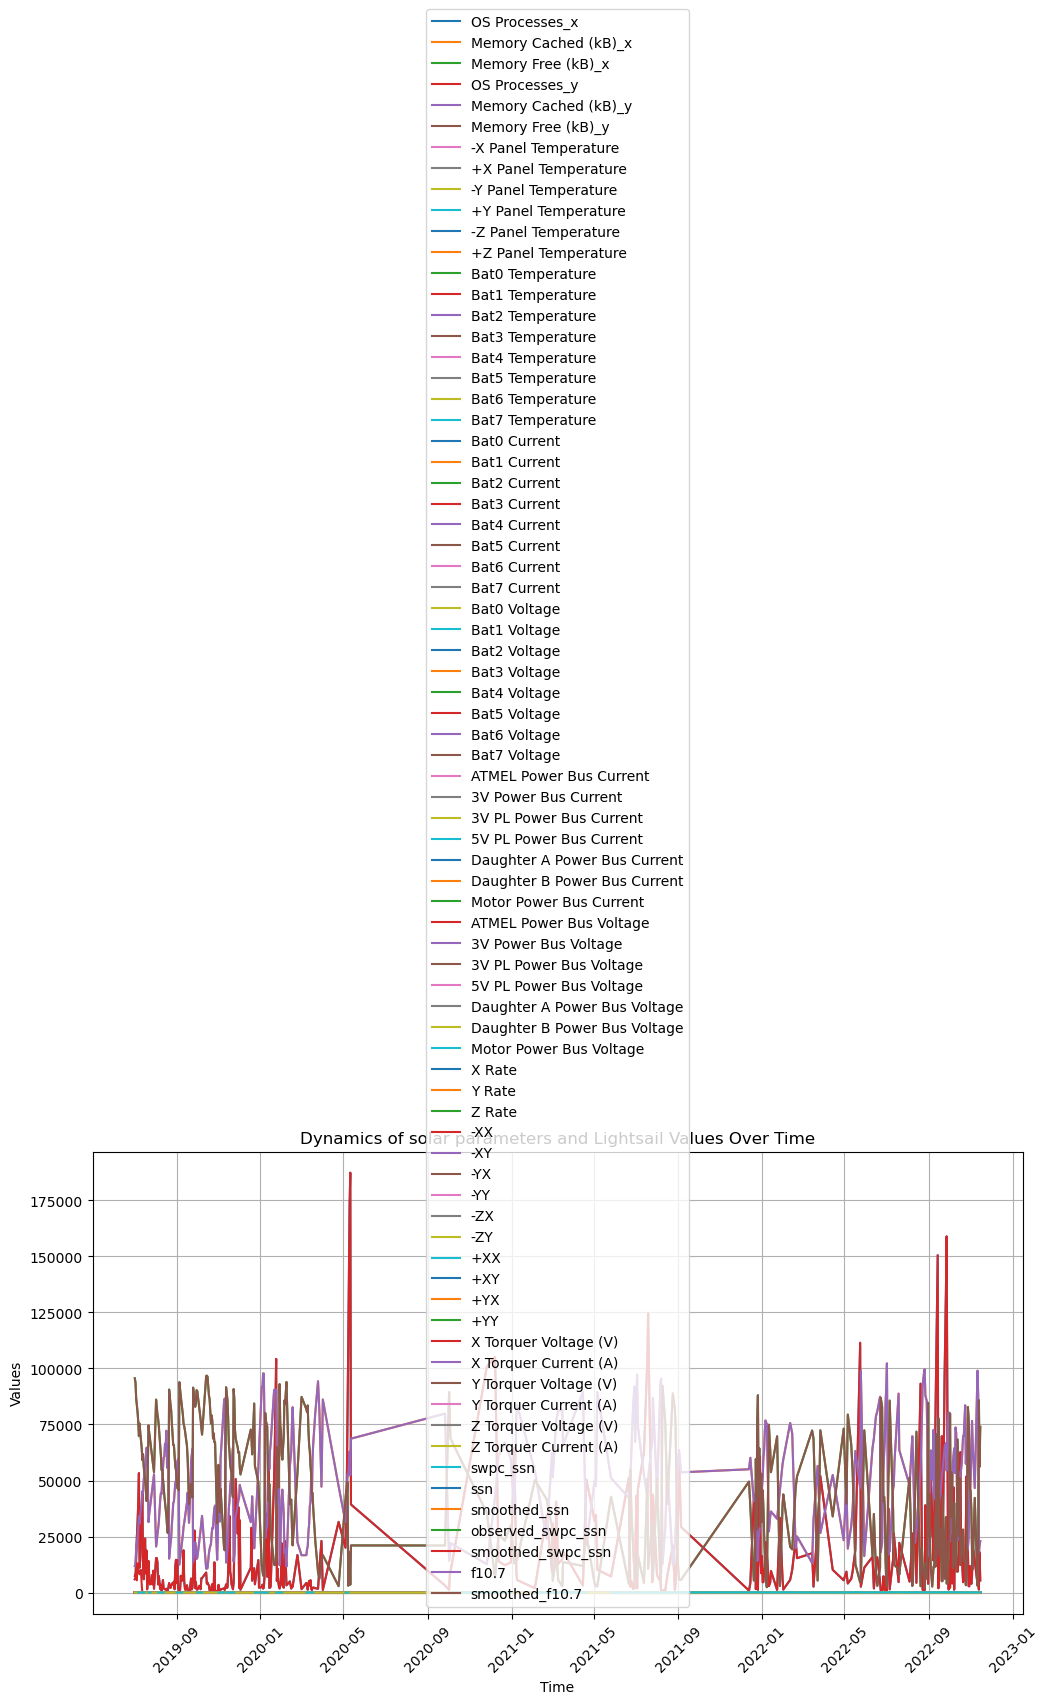

In [7]:
plt.figure(figsize=(12, 6))

for column in dynamics.columns:
    if column not in ["Time"]:
        plt.plot(dynamics["Time"], dynamics[column], label=column)

plt.title("Dynamics of solar parameters and Lightsail Values Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

plt.show()

In [8]:
print(dynamics.columns)

Index(['Time', 'OS Processes_x', 'Memory Cached (kB)_x', 'Memory Free (kB)_x',
       'OS Processes_y', 'Memory Cached (kB)_y', 'Memory Free (kB)_y',
       '-X Panel Temperature', '+X Panel Temperature', '-Y Panel Temperature',
       '+Y Panel Temperature', '-Z Panel Temperature', '+Z Panel Temperature',
       'Bat0 Temperature', 'Bat1 Temperature', 'Bat2 Temperature',
       'Bat3 Temperature', 'Bat4 Temperature', 'Bat5 Temperature',
       'Bat6 Temperature', 'Bat7 Temperature', 'Bat0 Current', 'Bat1 Current',
       'Bat2 Current', 'Bat3 Current', 'Bat4 Current', 'Bat5 Current',
       'Bat6 Current', 'Bat7 Current', 'Bat0 Voltage', 'Bat1 Voltage',
       'Bat2 Voltage', 'Bat3 Voltage', 'Bat4 Voltage', 'Bat5 Voltage',
       'Bat6 Voltage', 'Bat7 Voltage', 'ATMEL Power Bus Current',
       '3V Power Bus Current', '3V PL Power Bus Current',
       '5V PL Power Bus Current', 'Daughter A Power Bus Current',
       'Daughter B Power Bus Current', 'Motor Power Bus Current',
       'AT

# Dependency Graph Based on Highest Correlation

In this analysis, we compute the correlation between different variables in a dataset and visualize the relationships using a dependency graph. The following mathematical concepts are involved in this process:

## 1. Correlation Coefficient

The correlation coefficient quantifies the degree to which two variables are related. It is calculated using the formula:

$$
r_{xy} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}
$$


Where:
- $r_{xy}$ is the correlation coefficient between variables $X$ and $Y$.
- $\text{Cov}(X, Y)$ is the covariance between $X$ and $Y$.
- $\sigma_X$ is the standard deviation of variable $X$.
- $\sigma_Y$ is the standard deviation of variable $Y$.

## 2. Covariance

Covariance measures how much two random variables vary together. It is defined as:

$$
\text{Cov}(X, Y) = E\left[(X - E[X])(Y - E[Y])\right]
$$


Where:
- $E[X]$ is the expected value (mean) of $X$.
- $E[Y]$ is the expected value (mean) of $Y$.

## 3. Maximum Correlation

For each variable in the dataset, we find the variable with which it has the highest correlation. This is represented mathematically as:

$$
\text{max\_corr}(X) = \arg\max_{Y} r_{XY}
$$


Where:
- $X$ is a variable from the dataset.
- $Y$ represents all other variables in the dataset.
- $r_{XY}$ is the correlation coefficient between $X$ and $Y$.

## 4. Graph Representation

The relationships are represented as a graph where:
- Each node represents a variable.
- Each edge represents a relationship based on maximum correlation.

### Nodes
Each unique variable is added as a node:

$$
\text{nodes} = \{ "name": X, "name": Y, ...\}
$$


### Edges
An edge is created from each variable to its maximum correlated variable:

$$
\text{edges} = \{ "source": X, "target": Y\}
$$


## Conclusion

The resulting graph visualizes how each variable relates to its most correlated counterpart, providing insights into dependencies within the dataset.


In [19]:
from pyecharts import options as opts
from pyecharts.charts import Graph

correlation_matrix = dynamics.corr()

nodes = []
edges = []
for column in dynamics.columns:
    try:
        max_corr = correlation_matrix[column].drop(column).idxmax()

        if {"name": column} not in nodes:
            nodes.append({"name": column})
        if {"name": max_corr} not in nodes:
            nodes.append({"name": max_corr})

        edges.append({"source": column, "target": max_corr})
    except Exception as e:
        print(f"Failed to find max correlation for {column}: {e}")

graph = (
    Graph()
    .add("", nodes=nodes, links=edges)
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="Dependency Graph Based on Highest Correlation"
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item"),
    )
)

graph.render_notebook()

/tmp/ipykernel_72672/2382690022.py:10: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_corr = correlation_matrix[column].drop(column).idxmax()
/tmp/ipykernel_72672/2382690022.py:10: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_corr = correlation_matrix[column].drop(column).idxmax()


In [ ]:
import graphviz

correlation_matrix = dynamics.corr()

dot = graphviz.Digraph(format='png')

for column in dynamics.columns:
    try:
        dot.node(column)

        max_corr = correlation_matrix[column].drop(column).idxmax()
        
        dot.edge(column, max_corr)
        
    except Exception as e:
        print(f"Failed to add edge for {column}: {e}")

try:
    dot.render('dependency_graph', cleanup=True)
except Exception as e:
    print(f"Failed to save graph: {e}")
    
from IPython.display import Image, display

display(Image(filename='dependency_graph.png'))

In [ ]:
def plot_columns(dynamics: pd.DataFrame, cols1: list[str], cols2: list[str]):
    """
    Plots one column from dynamics against two columns from another DataFrame.

    Parameters:
    dynamics (pd.DataFrame): The DataFrame containing the data to plot.
    col1 (str): The name of the column to plot on the primary y-axis.
    cols2 (list): A list containing the names of two columns to plot on the secondary y-axis.
    """

    for col1 in cols1:
        if col1 not in dynamics.columns:
            print(f"Column '{col1}' does not exist in the DataFrame. Skipping.")
            continue

        for col in cols2:
            if col not in dynamics.columns or col == col1:
                continue

            if col == "Time":
                continue

            if col in cols1:
                continue

            fig, ax1 = plt.subplots(figsize=(12, 6))

            ax1.plot(
                dynamics["Time"], dynamics[col1], label=col1, marker="o", color="red"
            )
            ax1.set_xlabel("Time")
            ax1.set_ylabel(col1, color="red")
            ax1.tick_params(axis="y", labelcolor="red")

            ax2 = ax1.twinx()

            ax2.plot(dynamics["Time"], dynamics[col], label=col, marker="x")

            ax2.set_ylabel("Values", color="blue")
            ax2.tick_params(axis="y", labelcolor="blue")

            plt.title(f"{col1} and {col} Over Time")
            plt.xticks(rotation=45)

            lines, labels = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()

            ax2.legend(lines + lines2, labels + labels2)

            plt.grid()
            fig.tight_layout()

            plt.show()


solar_columns: list[str] = (
    swpc_observed_ssn.columns.drop("Obsdate").tolist()
    + swpc_observed_solar_cycle_indicies.columns.drop("time-tag").tolist()
)
plot_columns(dynamics, solar_columns, dynamics.columns)

In [ ]:
correlations = dynamics.corr(method='pearson').drop('Time')

print(correlations["swpc_ssn"].sort_values(ascending=False))

correlations = dynamics.corr(method='kendall').drop('Time')

print(correlations["swpc_ssn"].sort_values(ascending=False))

correlations = dynamics.corr(method='spearman').drop('Time')

print(correlations["swpc_ssn"].sort_values(ascending=False))

# Statistical Analysis Interpretation

In statistical analysis, particularly when examining the relationship between two variables, several key metrics provide insights into the nature and strength of that relationship. Here’s a breakdown of these metrics:

## 1. Correlation Coefficient
- **Definition**: The correlation coefficient quantifies the degree to which two variables are related.
- **Interpretation**:
  - A value close to **+1** indicates a strong positive correlation (as one variable increases, the other tends to increase).
  - A value close to **-1** indicates a strong negative correlation (as one variable increases, the other tends to decrease).
  - A value around **0** suggests little to no linear relationship.

## 2. Regression Equation
- **Definition**: The regression equation represents the fitted line from the regression analysis.
- **Form**: 
  $$
  y = b_0 + b_1x
  $$
  Where:
  - \(y\) is the dependent variable.
  - \(b_0\) is the intercept (expected value of \(y\) when \(x = 0\)).
  - \(b_1\) is the slope (change in \(y\) for a one-unit increase in \(x\)).
- **Interpretation**: The slope indicates how much change in the dependent variable is expected for each unit change in the independent variable.

## 3. R-squared (R²)
- **Definition**: R-squared measures how well the independent variable(s) explain the variability of the dependent variable.
- **Interpretation**:
  - An R² value close to **1** means that a large proportion of the variance in \(y\) can be explained by changes in \(x\).
  - An R² value close to **0** indicates that changes in \(x\) do not explain much of the variance in \(y\).

## 4. Standard Error of the Slope
- **Definition**: This statistic provides an estimate of how much variability exists in the slope estimate.
- **Interpretation**: A smaller standard error relative to the slope suggests greater confidence in the slope estimate.

## 5. P-value
- **Definition**: The p-value tests the null hypothesis that there is no relationship between the independent and dependent variables.
- **Interpretation**:
  - A small p-value (typically < 0.05) suggests strong evidence against the null hypothesis, indicating a statistically significant relationship between variables.

## 6. Confidence Interval (CI)
- **Definition**: The confidence interval provides a range within which we expect the true parameter (e.g., slope) to fall with a certain level of confidence (typically 95%).
- **Interpretation**: If the confidence interval does not include zero, it supports that there is a statistically significant relationship between variables.

In [ ]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

for column in dynamics.columns:
    if not column in ["swpc_ssn", "Time"]:
        plt.figure(figsize=(10, 6))

        sns.scatterplot(data=dynamics, x="swpc_ssn", y=column)

        x = dynamics["swpc_ssn"]
        y = dynamics[column]
        x = sm.add_constant(x)

        model = sm.OLS(y, x, missing='drop').fit()
        sns.regplot(data=dynamics, x="swpc_ssn", y=column, scatter=False, color="red")

        correlation_coefficient = np.corrcoef(dynamics["swpc_ssn"], dynamics[column])[
            0
        ][1]
        r_squared = model.rsquared

        intercept = model.params.iloc[0]
        slope = model.params.iloc[1]

        std_err = model.bse.iloc[1]
        p_value = model.pvalues.iloc[1]

        conf_int = model.conf_int().loc["swpc_ssn"]

        plt.title(f"Scatter Plot of SWPC SSN vs {column}")
        plt.xlabel("SWPC SSN")
        plt.ylabel(column)

        textstr = (
            f"Correlation: {correlation_coefficient:.2f}\n"
            f"Regression: y = {intercept:.2f} + {slope:.2f}x\n"
            f"R²: {r_squared:.2f}\n"
            f"Slope Std Err: {std_err:.2f}\n"
            f"P-value: {p_value:.3f}\n"
            f"95% CI: [{conf_int[0]:.2f}, {conf_int[1]:.2f}]"
        )

        plt.gca().text(
            0.05,
            0.95,
            textstr,
            transform=plt.gca().transAxes,
            fontsize=12,
            verticalalignment="top",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.5),
        )

        plt.grid()
        plt.show()